# Words embedding

In this notebook, I will show how to embed words in higher-dimensional space, and visualize them to analyse semantic similarities.

In [178]:
import numpy as np
from pathlib import Path
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from matplotlib import image

%pip install -e .
from transformers.word_embedding import preprocess_text

/Users/juan.rodriguez/Desktop/Transformers/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


1. We need to break down the sentences into tokens.

In [154]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world we live in.",
    "Deep learning techniques have greatly improved image recognition.",
    "Natural language processing allows computers to understand human language.",
    "Data science combines statistics, computer science, and domain knowledge.",
    "The weather is nice today, perfect for a walk in the park.",
    "Cats are often seen as independent and curious creatures.",
    "The stock market fluctuates based on various economic indicators.",
    "Exploring new cuisines can be an exciting culinary adventure.",
    "Machine learning algorithms can learn from data and make predictions.",
]

# Preprocess sentences
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]

print(preprocessed_sentences)

[['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'], ['artificial', 'intelligence', 'transforming', 'world', 'live'], ['deep', 'learning', 'techniques', 'greatly', 'improved', 'image', 'recognition'], ['natural', 'language', 'processing', 'allows', 'computers', 'understand', 'human', 'language'], ['data', 'science', 'combines', 'statistics', 'computer', 'science', 'domain', 'knowledge'], ['weather', 'nice', 'today', 'perfect', 'walk', 'park'], ['cats', 'often', 'seen', 'independent', 'curious', 'creatures'], ['stock', 'market', 'fluctuates', 'based', 'various', 'economic', 'indicators'], ['exploring', 'new', 'cuisines', 'exciting', 'culinary', 'adventure'], ['machine', 'learning', 'algorithms', 'learn', 'data', 'make', 'predictions']]


2. We need to learn an embedding for each word using Word2Vec. Word2Vec learns which words tend to co-occur within a small window

In [162]:
# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_sentences, vector_size=50, min_count=1, seed=42)

In [163]:
# 2. Extract words and their vectors
word_vectors = model.wv
words = list(word_vectors.index_to_key)
vectors = word_vectors.vectors

In [85]:
len(words), vectors.shape

(62, (62, 50))

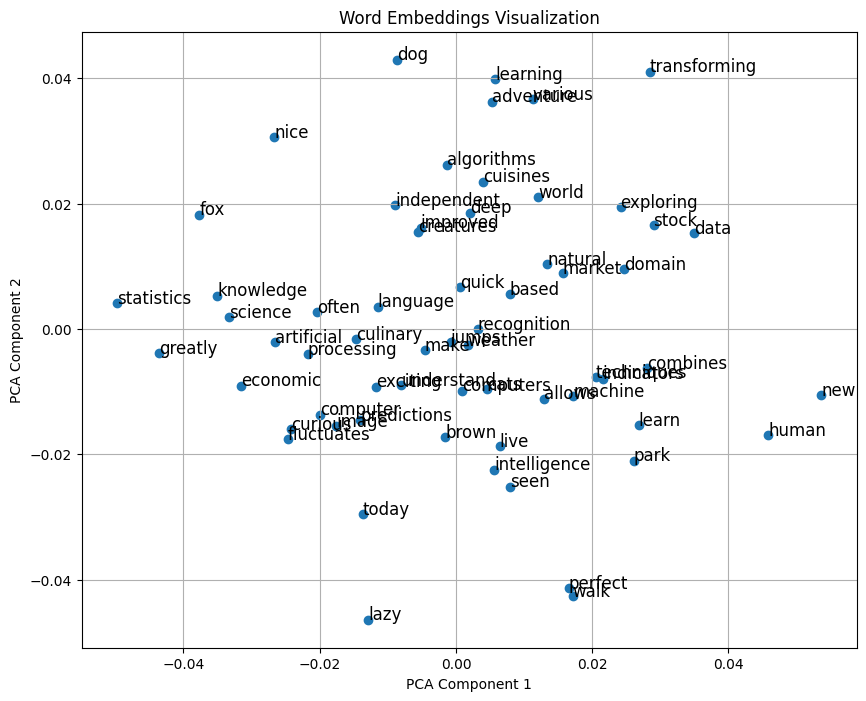

In [88]:
# Reduce dimensionality of word vectors for visualization
word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
result = pca.fit_transform(word_vectors)  # Fit and transform the word vectors

# Plot the words in a 2D space
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate words in the plot
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


Words similarities:    
  - +1.0 → vectors point in the same direction
  - 0.0 → unrelated / orthogonal
  - –1.0 → opposite meaning

We will use cosine similarity

In [165]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")

In [170]:
print("Positive similarity between sushi and japanese: ", word_vectors.similarity('sushi', 'japanese'))
print("Negative similarity between paella and japanese: ", word_vectors.similarity('paella', 'japanese'))
print("Approx 0 similarity between sushi and gravity: ", word_vectors.similarity('sushi', 'gravity'))

Positive similarity between sushi and japanese:  0.31159616
Negative similarity between paella and japanese:  -0.1429195
Approx 0 similarity between sushi and gravity:  -0.051777765


In [189]:
![Alt text](../inputs/word_embedding_1.png)

zsh:1: bad pattern: [Alt


![Alt text](/Users/juan.rodriguez/Desktop/Transformers/inputs/word_embedding_1.png)

In [ ]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

queen: 0.7699


In [102]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [126]:
# Check the "most similar words", using the default "cosine similarity" measure.
result = word_vectors.most_similar(positive=['spanish', 'japanese'], negative=['sushi'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

portuguese: 0.6958


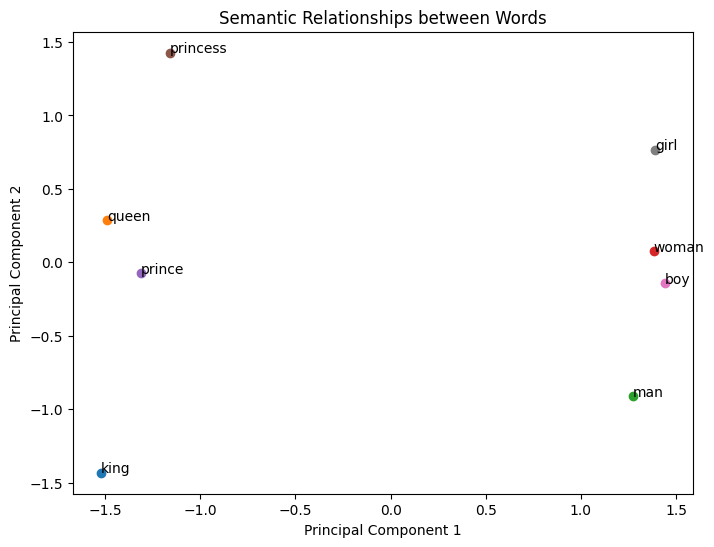

In [103]:
words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'boy', 'girl']
vectors = [model[word] for word in words]

# PCA object to reduce the data to 2 dimensions (so it can be plotted in a 2D space)
pca = PCA(n_components=2)
# Transform the vectors to 2 dimensions
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title('Semantic Relationships between Words')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()